# Perceptron Classico


In [8]:
import random
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
# This line is necessary to show the plots.
%matplotlib inline




In [9]:
# funcoes auxiliares
# Pesos
def Start_Pesos(Qts_Variaveis_Explicativas):
    return np.random.rand(Qts_Variaveis_Explicativas+1)  

In [10]:
#Atualiza
def Atualiza_Pesos(W_atual,Xn,Yn):
    return W_atual+Yn*Xn

In [11]:
#sinal
def sign(x):
    if x >= 0:
        return 1
    return -1

In [12]:
# valor previsto
def Calcula_Previsto(W_Atual,Xn):    
    produto = np.matmul(W_Atual,Xn)
    return sign(produto)

In [59]:
# Ordena o dadaset X e Y(variaveis explicativas)
def Ordena(DadosX,DadosY):
    DadosY = np.transpose(np.matrix(DadosY))
    Dados_Aux = np.append(DadosX,DadosY,axis=1)
    Dados_Full = pd.DataFrame(Dados_Aux)
    lista=list(range(0,DadosY.shape[0]-1))
    Dados_Full = Dados_Full.sort_values(lista)
    return(np.array(Dados_Full))
    

In [60]:
# Adiciona a coluna de constantes
def Add_bias(Dados):
    qts_linhas=np.shape(Dados)[0]
    bias = np.ones((qts_linhas,1))
    resultado = np.c_[bias,Dados]
    return np.array(resultado)  

In [61]:
# Plota a solucao do perceptron
def PlotaSolucaoPerceptronClassico(DatasetAB,labelsAB,W_Classic):
    
    # variaveis auxiliares e geracao de pontos para o limiar
    xlim_max=np.max(DatasetAB[:,0])
    xlim_min=np.min(DatasetAB[:,0])
    x = np.linspace(xlim_min, xlim_max, 3)
    y= -(W_Classic[1]/W_Classic[2])*x-W_Classic[0]/W_Classic[2]
    
    # plot
    plt.title('Separação dos conjuntos')
    plt.scatter(DatasetAB[:,0], DatasetAB[:,1], s=20, c=labelsAB)
    plt.plot(x, y, 'k-', linewidth=1,alpha=1)
    return(plt.show())

In [62]:
# Calculo do erro dentro do treino

def Erro_In(X,Y,W):
    # Quantidade de instancias
    Qts_Instancias=np.shape(Y)[0]
    # usando o W aual calcula em toda a base a classificao prevista
    Vetor_Previstos = np.array(list(map(lambda x:Calcula_Previsto(W,x),X)))
    
    # verifica quais instancias o classificador errou
    Vetor_Erros=(np.equal(Vetor_Previstos,Y))
    Vetor_Erros=Vetor_Erros.astype(int)-1
    Vetor_Erros=np.abs(Vetor_Erros)
    
    # calcula o erro dentro do treino
    Erro=Vetor_Erros.sum()/Qts_Instancias
    return(Erro)

In [63]:
X=Add_bias(np.array([[0,0],
                     [1,1],
                     [1,0],
                     [1,1],
                     [1,0.9]]))

Y=np.array([-1,1,1,1,-1])

W=np.array([0.5,-1,1])
Y.shape[0]
list(range(0,Y.shape[0]-1))

[0, 1, 2, 3]

In [64]:
Dados_Full=Ordena(X,Y)
Dados_Full

array([[ 1. ,  0. ,  0. , -1. ],
       [ 1. ,  1. ,  0. ,  1. ],
       [ 1. ,  1. ,  0.9, -1. ],
       [ 1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ,  1. ]])

In [137]:
Y=np.array(Dados_Full[:,-1])
Y

array([-1.,  1., -1.,  1.,  1.])

In [138]:
X=np.array(Dados_Full[:,0:-1])
X

array([[1. , 0. , 0. ],
       [1. , 1. , 0. ],
       [1. , 1. , 0.9],
       [1. , 1. , 1. ],
       [1. , 1. , 1. ]])

In [141]:
def Perceptron_Classico(W,X,Y,maxiter=1000,reorder=True):
    """ X: variavel com a coluna de bias,
        Y: rotulos
        W: Start Inicial"""
    
    # Preparacao da base (ordenacao)
    Dados_Completos=Ordena(X,Y)
    X=np.array(Dados_Completos[:,0:-1])
    Y=np.array(Dados_Completos[:,-1])
    
    Qts_Instancias = np.shape(Y)[0] # define a quantidade de instancias
    i=0
    iteracoes=1
    WCP = W.flatten()    
    while i<=Qts_Instancias-1:
        if iteracoes>=maxiter and reorder==False:
            break
        Previsto = Calcula_Previsto(W,X[i])
        if Previsto != Y[i]:
            W=Atualiza_Pesos(W,X[i],Y[i])
            i=0
            iteracoes+=1
            WCP=np.vstack([WCP,W])
        else:
            i+=1
            iteracoes+=1
    print(iteracoes)
    return WCP    

In [143]:
w_classic = Perceptron_Classico(W,X,Y,1000,False)
w_classic

1000


array([[ 5.00000000e-01, -1.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01, -1.00000000e+00,  1.00000000e+00],
       [ 5.00000000e-01,  0.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01,  0.00000000e+00,  1.00000000e+00],
       [ 5.00000000e-01,  1.00000000e+00,  1.00000000e+00],
       [-5.00000000e-01,  1.00000000e+00,  1.00000000e+00],
       [-1.50000000e+00,  0.00000000e+00,  1.00000000e-01],
       [-5.00000000e-01,  1.00000000e+00,  1.00000000e-01],
       [-1.50000000e+00,  0.00000000e+00, -8.00000000e-01],
       [-5.00000000e-01,  1.00000000e+00, -8.00000000e-01],
       [ 5.00000000e-01,  2.00000000e+00,  2.00000000e-01],
       [-5.00000000e-01,  2.00000000e+00,  2.00000000e-01],
       [-1.50000000e+00,  1.00000000e+00, -7.00000000e-01],
       [-5.00000000e-01,  2.00000000e+00, -7.00000000e-01],
       [-1.50000000e+00,  1.00000000e+00, -1.60000000e+00],
       [-5.00000000e-01,  2.00000000e+00, -1.60000000e+00],
       [-1.50000000e+00,  1.00000000e+00

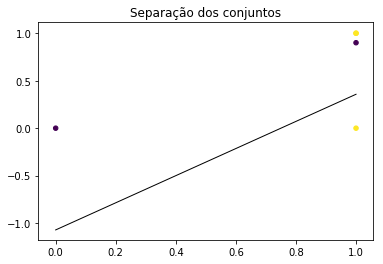

In [215]:

DadosY = np.transpose(np.matrix(Y))
Dados_Aux = np.append(X,DadosY,axis=1)
PlotaSolucaoPerceptronClassico(X[:,1:],Y,w_classic[-1])

In [217]:
W=w_classic[-1]
W

array([-1.5,  2. , -1.4])

In [186]:
X

array([[1. , 0. , 0. ],
       [1. , 1. , 1. ],
       [1. , 1. , 0. ],
       [1. , 1. , 1. ],
       [1. , 1. , 0.9]])

In [187]:
Y

array([-1,  1,  1,  1, -1])

In [195]:
Erro_In(X,Y,W)

0.4

In [189]:
Qts_Instancias=np.shape(Y)[0]
Qts_Instancias

5

In [190]:
Vetor_Previstos = np.array(list(map(lambda x:Calcula_Previsto(W,x),X)))
Vetor_Previstos

array([-1, -1,  1, -1, -1])

In [191]:
Vetor_Erros=(np.equal(Vetor_Previstos,Y))
Vetor_Erros=Vetor_Erros.astype(int)-1
Vetor_Erros=np.abs(Vetor_Erros)
Vetor_Erros

array([0, 1, 0, 1, 0])

In [192]:
Erro_In=Vetor_Erros.sum()/Qts_Instancias
Erro_In

0.4

In [193]:
Qts_Instancias

5

In [179]:
def PocketPerceptron(W,X,Y,maxiter=1000):
    """PocketPerceptron function implements the pocket perceptron. 

    This algorithm starts by checking if all training samples are correctly classified.
    If some are not, choose one sample not correctly classified and adjust W. Then it 
    will repeat the above procedure until all samples are correctly classified, or until 
    the number of iterations reaches maxiter.

    Parameters
    ----------
    W : numpy array of floats
        The initial set of weights for the perceptron classificator.
    X : numpy array of floats
        The dataset with the bias (first column is equal to 1.0).
    Y : numpy array of floats
        The labels (-1.0, ou 1.0) for each line of X.
    maxiter : integer
        The maximum number of iterations allowed before stopping.

    Returns
    -------
    A tuple (WPP, WPP_best)
    WPP : list of numpy array of floats
         All the weights of the perceptron classifier computed by the 
         algorithm. We need all of them to generate a movie later.
    WPP_best : numpy array of floats
        Array of weights found in the iteration with the least misclassifications.
        If the dataset is linearly separable and maxiter is large enough, WPP_best = WPP[-1]
    
    """

    # Sets the random seed to guarantee reproducibility.
    np.random.seed(34191)
    
    # shuffles both X and Y in the same order
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]
    
    # YOUR CODE HERE
    ####raise NotImplementedError()
    
    # Preparacao da base (ordenacao tanto da variaveis explicativas como dos rotulos)
    Dados_Completos=Ordena(X,Y)
    X=np.array(Dados_Completos[:,0:-1])
    Y=np.array(Dados_Completos[:,-1])
    
    Qts_Instancias = np.shape(Y)[0] # define a quantidade de instancias
    
    i=0
    iteracoes=1
    WCP = W.flatten() 
    W_Best= W.flatten() 
    W_Atual= W.flatten() 
    while i<=Qts_Instancias-1:
        if iteracoes>maxiter:
            break
        Previsto = Calcula_Previsto(W_Atual,X[i])
        if Previsto != Y[i]:
            W_Novo=Atualiza_Pesos(W_Atual,X[i],Y[i])
            print(W_Novo)
            Erro_Novo = Erro_In(X,Y,W_Novo)
            Erro_Atual = Erro_In(X,Y,W_Atual)
            if Erro_Novo<Erro_Atual:
                W_Best=W_Novo
            i=0
            WCP=np.vstack([WCP,W_Novo])
            iteracoes+=1
            W_Atual=W_Novo.flatten() 
        else:
            i+=1
            iteracoes+=1
    return (WCP,W_Best)

In [180]:
X=Add_bias(np.array([[0,0],
                     [1,1],
                     [1,0],
                     [1,1],
                     [1,0.9]]))

Y=np.array([-1,1,1,1,-1])

W=np.array([0.5,-1,1])

In [181]:
X

array([[1. , 0. , 0. ],
       [1. , 1. , 1. ],
       [1. , 1. , 0. ],
       [1. , 1. , 1. ],
       [1. , 1. , 0.9]])

In [182]:
Y

array([-1,  1,  1,  1, -1])

In [183]:
W

array([ 0.5, -1. ,  1. ])

In [205]:
w_pocket=PocketPerceptron(W,X,Y,2)

In [206]:
w_pocket

(array([-1.5,  2. , -1.4]), array([-1.5,  2. , -1.4]))

In [207]:
# Analises
w_geral=w_pocket[0]
w_geral

array([-1.5,  2. , -1.4])

In [208]:
w_best=w_pocket[1]
w_best

array([-1.5,  2. , -1.4])

In [213]:
Erro_In(X,Y,w_geral[-1])

0.4

In [211]:
Erro_In(X,Y,w_best)

0.4

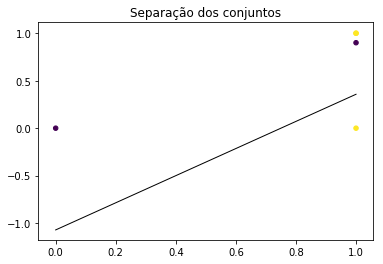

In [216]:
DadosY = np.transpose(np.matrix(Y))
Dados_Aux = np.append(X,DadosY,axis=1)
PlotaSolucaoPerceptronClassico(X[:,1:],Y,w_best)